In [2]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv('netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning & Pre-Processing

In [5]:
# Name of all the features
for i in df.columns:
    print(i)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [6]:
# Find All the null values in the dataset.
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

#Most of the nulls appear in Director, Cast and Country. Difficult to see a correlation of any feature with director and cast. So we will focus on the rest.


Number of missing values in director :  2634
Number of missing values in cast :  825
Number of missing values in country :  831
Number of missing values in date_added :  10
Number of missing values in rating :  4
Number of missing values in duration :  3


# Which year has most releases?

In [11]:
#The expression df['count'] = 1 assigns the value 1 to a new or existing column named 'count' in a DataFrame object called df.
df['count']=1
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [12]:
#performing a group-by operation on the DataFrame df based on the 'release_year' column

df1=df.groupby('release_year').sum().reset_index()
df2=df1.tail(20)

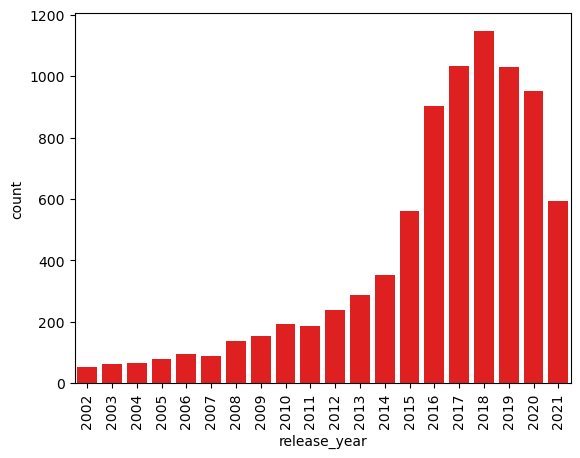

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df2,x='release_year',y='count', color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Year 2017 had most releases.

# No.of Movies and T V Shows

In [14]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [16]:
movies_df=df[df['type']=='Movie']
tv_shows=df[df['type']!='Movie']
movies_df.shape
tv_shows.shape

(2676, 13)

In [15]:
# No. of movies on netfix is :  5185 

#No. of T V Shows on netflix is :  147

# In which year did netflix add more content to the platform?

In [17]:
df['date_added']=pd.to_datetime(df['date_added'])

In [18]:
df['Year']=df['date_added'].dt.year

In [19]:
df2=df.groupby('Year')['count'].sum().reset_index()

In [20]:
df2.sort_values('count',ascending=False,inplace=True)
df2.head()

,Year,count
11,2019.0,2016
12,2020.0,1879
10,2018.0,1649
13,2021.0,1498
9,2017.0,1188


In [20]:
#Year 2019 is the year in which most of the films were added.

# Independent of the year, which is the best month to add new content?

In [21]:
df['Month']=df['date_added'].dt.month

In [22]:
df3=df.groupby('Month')['count'].sum().reset_index()
df3.sort_values('count',ascending=False,inplace=True)
df3.head(5)

,Month,count
6,7.0,827
11,12.0,813
8,9.0,770
3,4.0,764
9,10.0,760


In [24]:
#October (10th month) is the best month to add new content on the platform.

# Which Are The Top Content Producting Countries on Netflix?

Text(0.5, 1.0, 'Top 10 Content Producing Countries')

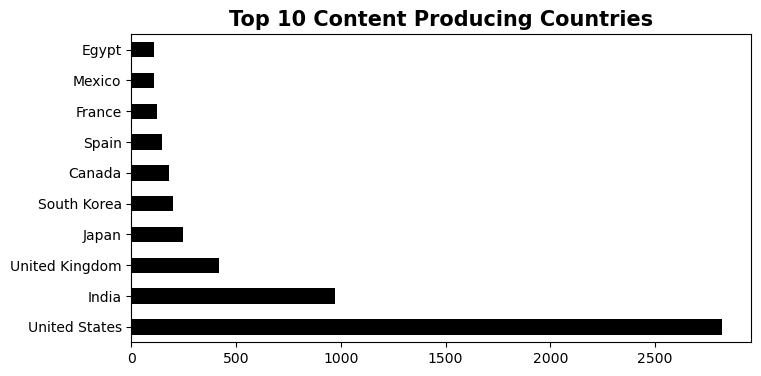

In [24]:
plt.figure(figsize=(8,4))
df['country'].value_counts().sort_values(ascending=False)[:10].plot(kind="barh",color="Black")
plt.title('Top 10 Content Producing Countries',fontweight="bold", size=15)

In [25]:
#United States is predictably the largest content producer followed by India.

#United Kingdom, Japan and Korea are the other top 5 producers of content.

# Content-type Rating

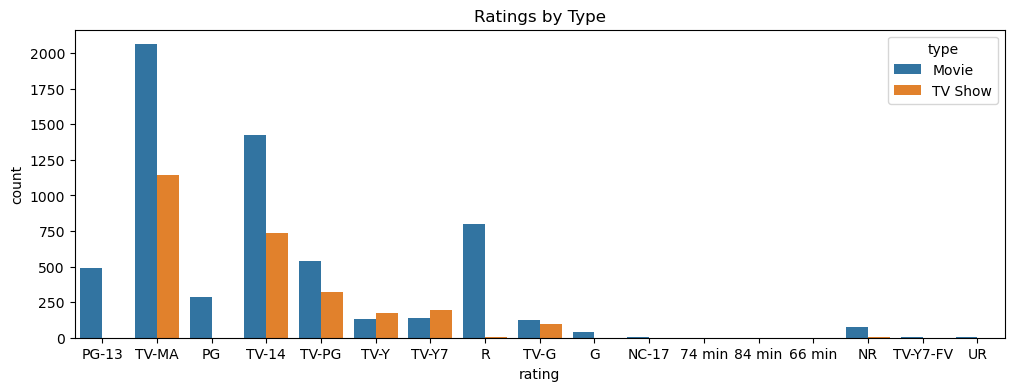

In [31]:
plt.figure(figsize =(12,4))
sns.countplot(x = "rating", hue = "type", data=df)
plt.title("Ratings by Type")
plt.show()

In [32]:
#So most content in Netflix seems to be in the Matured category which would have some amount of violence, offensive and explicit content.

# Insights

In [ ]:
1. The year 2017 had the highest number of releases on Netflix, indicating a significant growth in content availability during that period.
2. Netflix offers a vast library of content, with 5,185 movies and 147 TV shows available for streaming, showcasing a diverse range of options for subscribers.
3. In terms of content addition, the year 2019 witnessed the highest number of film additions to the Netflix platform, suggesting a focus on expanding the movie collection during that period.
4. October appears to be the most favorable month for introducing new content on Netflix. This observation could indicate a strategic approach to coincide with seasonal viewing trends or specific events during that month.
5. The United States emerges as the largest content producer on Netflix, India also holds a significant position as a content producer, showcasing the global reach and diversity of Netflix's offerings. 
Additionally, the United Kingdom, Japan, and Korea round out the top five content-producing countries on the platform, emphasizing a mix of Western and Asian content.
6. A notable trend on Netflix is the prevalence of content in the "Matured" category, which implies that a significant portion of the available content may contain elements of violence, offensive material, or explicit content. 
This observation suggests that Netflix caters to a wide range of audience preferences, including those seeking more mature or edgier content.